<a href="https://colab.research.google.com/github/AnaLiliaTV2407/Diplomado_CMCD/blob/main/Tarea4_Autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##****Conjunto de datos de Autos****

---



In [86]:
#Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Cargamos la librería warnings para dejar el Notebook 
#sin advertencias 
import warnings
warnings.filterwarnings('ignore')

Es una base de datos de algunas caracteristicas de autos o carros

1. mpg:           Millas por Galon
2. cylinders:     Cilindros
3. displacement:  Desplazamiento
4. horsepower:    Caballos de fuerza
5. weight:        Peso
6. acceleration:  Aceleración
7. model year:    Año del modelo
8. origin:        Origen del Auto
9. car name:      Nombre del Auto

##Cargamos base de datos

---



In [87]:
#Importamos el conjunto de datos con el cual se va a trabajar
Auto= pd.read_csv('/content/mpg.csv')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


##Exploración de datos

---



In [ ]:
#Se realiza un análisis exploratorio de los datos
#Tamaño de la base de datos
print('-------------------------------')
print('Tamaño de la matriz de datos')
print('-------------------------------')
print(Auto.shape)
#Tipos de datos de cada uno de los atributos
print()
print('------------------')
print('Tipo de datos')
print('------------------')
print(Auto.dtypes)
#Inspecciones cuantos valores unicos tienen las columnas
print()
print('------------------')
print('Valores ínicos por columnas')
print('------------------')
print(Auto.nunique(axis=0))
#Análisis descriptivo de las variables numericas 
print()
print('----------------------------------')
print('Análisis estadístico descriptivo')
print('----------------------------------')
Auto.describe()

-------------------------------
Tamaño de la matriz de datos
-------------------------------
(398, 9)

------------------
Tipo de datos
------------------
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

------------------
Valores unicos por columna
------------------
mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

----------------------------------
Análsis estadístico descriptivo
----------------------------------


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [88]:
#Revisamos si no hay datos nulos en la base de datos
Auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [89]:
#nos traemos esos datos para observar las filas
Auto[Auto.isnull().any(axis=1)]



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [90]:
#Eliminamos los NA
Auto = Auto.dropna()
Auto.shape

(392, 9)

##Analisis de la distribución

---



Para esto hacemos una reducción de nuestra base original, seleccionando las columnas, de origen, nombre, cylindros y año del modelo

In [91]:
Auto2 = Auto[['origin','name','cylinders','model_year']]
Auto2

,origin,name,cylinders,model_year
0,usa,chevrolet chevelle malibu,8,70
1,usa,buick skylark 320,8,70
2,usa,plymouth satellite,8,70
3,usa,amc rebel sst,8,70
4,usa,ford torino,8,70
...,...,...,...,...
393,usa,ford mustang gl,4,82
394,europe,vw pickup,4,82
395,usa,dodge rampage,4,82
396,usa,ford ranger,4,82


In [92]:
#Creamos una columna artificial categorizando los mpg, con Bajo, Alto y Mediano
#Bajo min a 17
#Medio 17 a 29
# Alto 29 al maximo

Auto2['mpg_level'] = Auto['mpg'].apply(lambda x: 'Bajo' if x<17 else 'Alto' if x>29 else 'Medio')

Auto2

,origin,name,cylinders,model_year,mpg_level
0,usa,chevrolet chevelle malibu,8,70,Medio
1,usa,buick skylark 320,8,70,Bajo
2,usa,plymouth satellite,8,70,Medio
3,usa,amc rebel sst,8,70,Bajo
4,usa,ford torino,8,70,Medio
...,...,...,...,...,...
393,usa,ford mustang gl,4,82,Medio
394,europe,vw pickup,4,82,Alto
395,usa,dodge rampage,4,82,Alto
396,usa,ford ranger,4,82,Medio


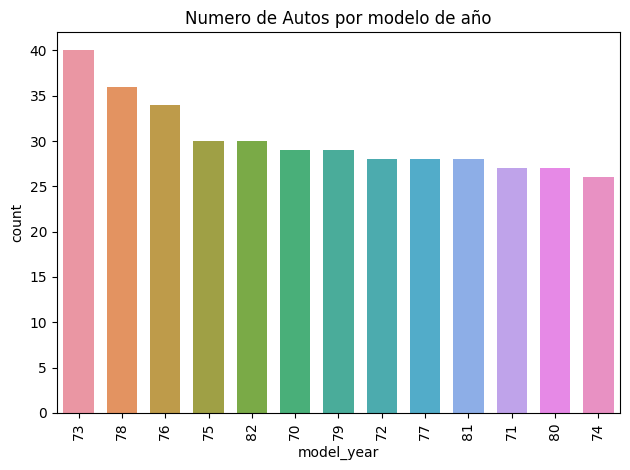

In [84]:
#Grafica 1
p=sns.countplot(x='model_year',data=Auto2, order=Auto2['model_year'].value_counts().index, width= 0.7)
p.set(title="Numero de Autos por modelo de año")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

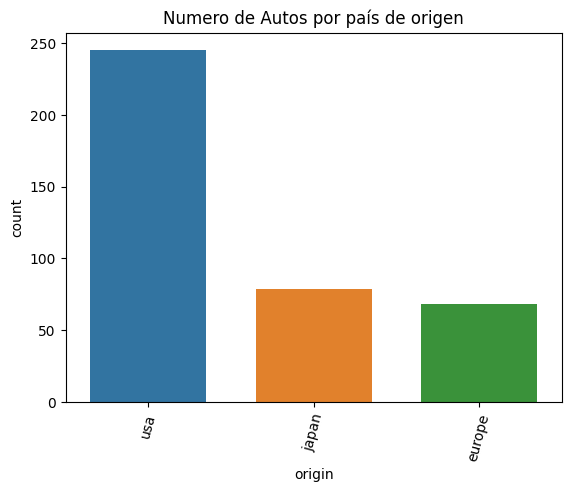

In [51]:
p1=sns.countplot(x='origin',data=Auto2, order=Auto2['origin'].value_counts().index, width= 0.7)
p1.set(title="Numero de Autos por país de origen")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

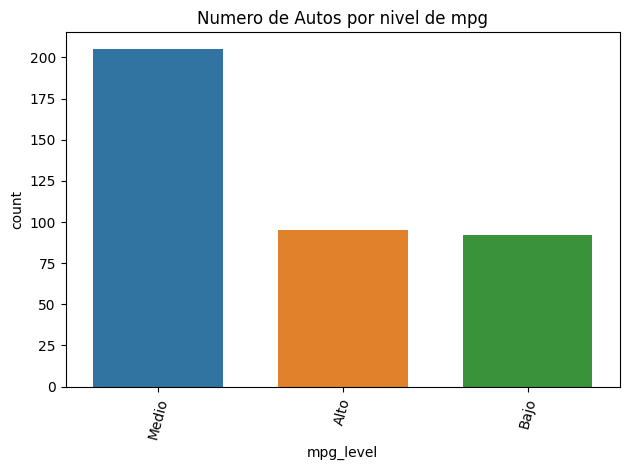

In [53]:
p2=sns.countplot(x='mpg_level',data=Auto2, order=Auto2['mpg_level'].value_counts().index, width= 0.7)
p2.set(title="Numero de Autos por nivel de mpg")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

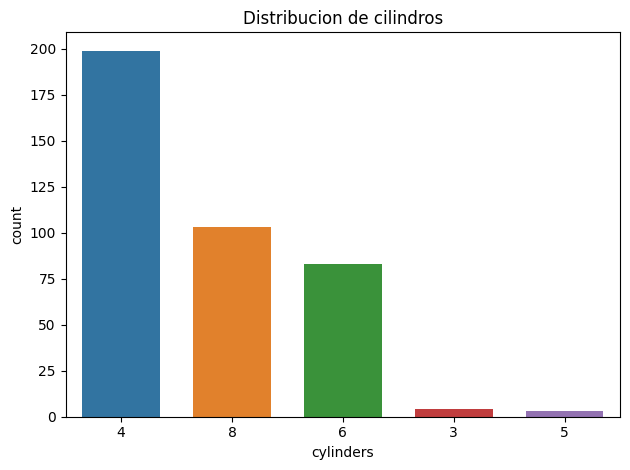

In [78]:
p3=sns.countplot(x='cylinders',data=Auto2, order=Auto2['cylinders'].value_counts().index, width= 0.7)
p3.set(title="Distribucion de cilindros")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [93]:
Auto2['compania_auto']=Auto2['name'].apply(lambda x: x.split()[0])
#Auto2.drop('name', axis=1, inplace=True)
Auto2.head()

,origin,name,cylinders,model_year,mpg_level,compania_auto
0,usa,chevrolet chevelle malibu,8,70,Medio,chevrolet
1,usa,buick skylark 320,8,70,Bajo,buick
2,usa,plymouth satellite,8,70,Medio,plymouth
3,usa,amc rebel sst,8,70,Bajo,amc
4,usa,ford torino,8,70,Medio,ford


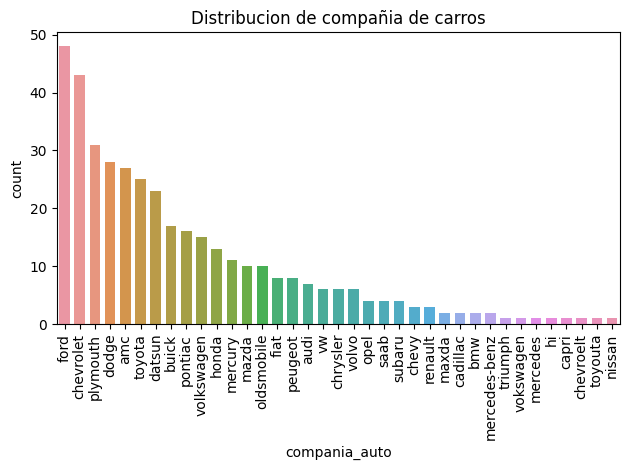

In [95]:
p5=sns.countplot(x='compania_auto',data=Auto2, order=Auto2['compania_auto'].value_counts().index, width= 0.7)
p5.set(title="Distribucion de compañia de carros")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

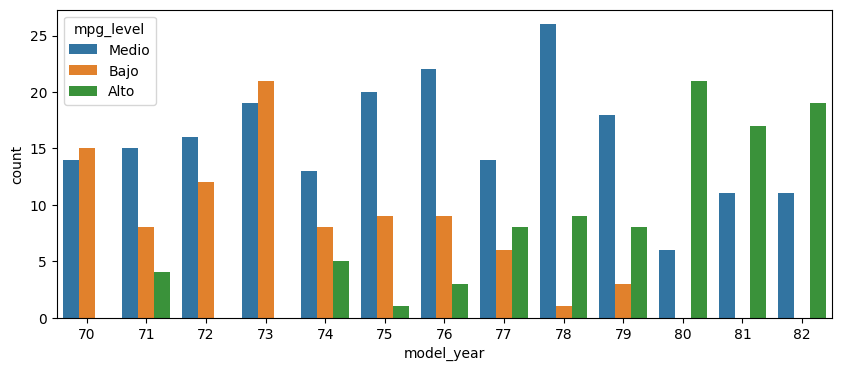

In [99]:
fig = plt.figure(1, (10,4))
sns.countplot(x='model_year', hue='mpg_level', data=Auto2)
plt.show()

<Figure size 1000x400 with 0 Axes>

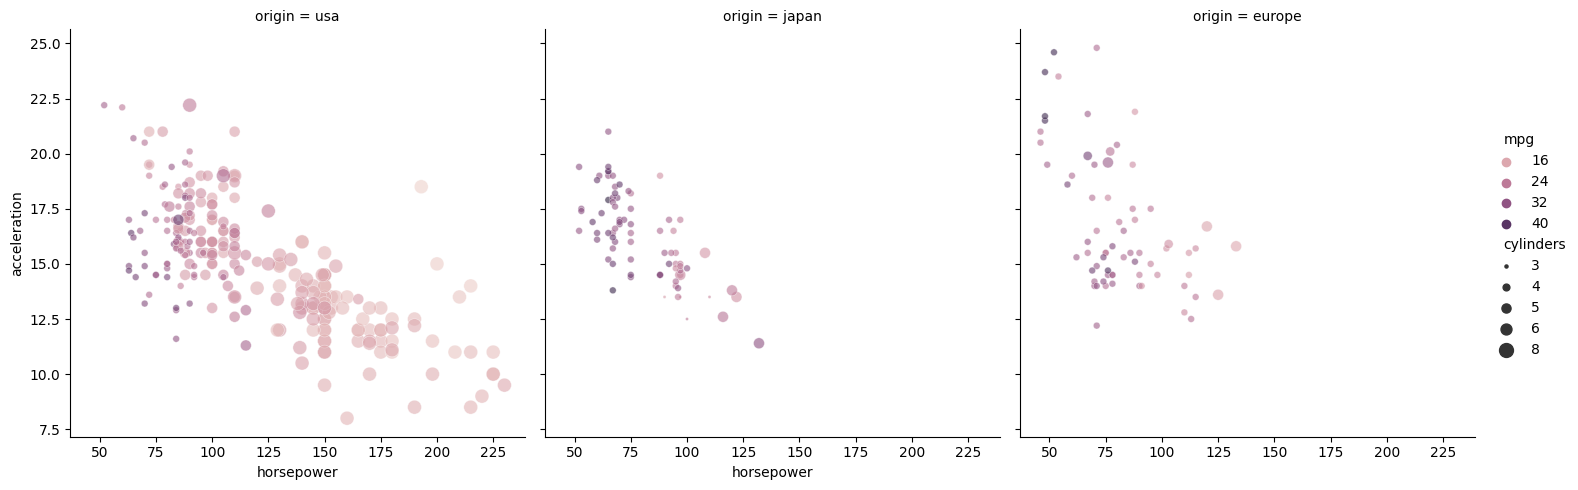

In [104]:
fig = plt.figure(1, (10, 4))
#ax1 = plt.subplot(1,1,1)
sns.relplot(x='horsepower', y='acceleration', hue='mpg',size='cylinders', col='origin',
            data=Auto, kind='scatter', sizes=(5,100), alpha=0.6)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

En cada región hay una relación negativa entre potencia y aceleración.
los vehículos con bajo mpg tienen baja aceleración y alta potencia.
Los vehículos con más cilindros tienen baja aceleración y alta potencia.

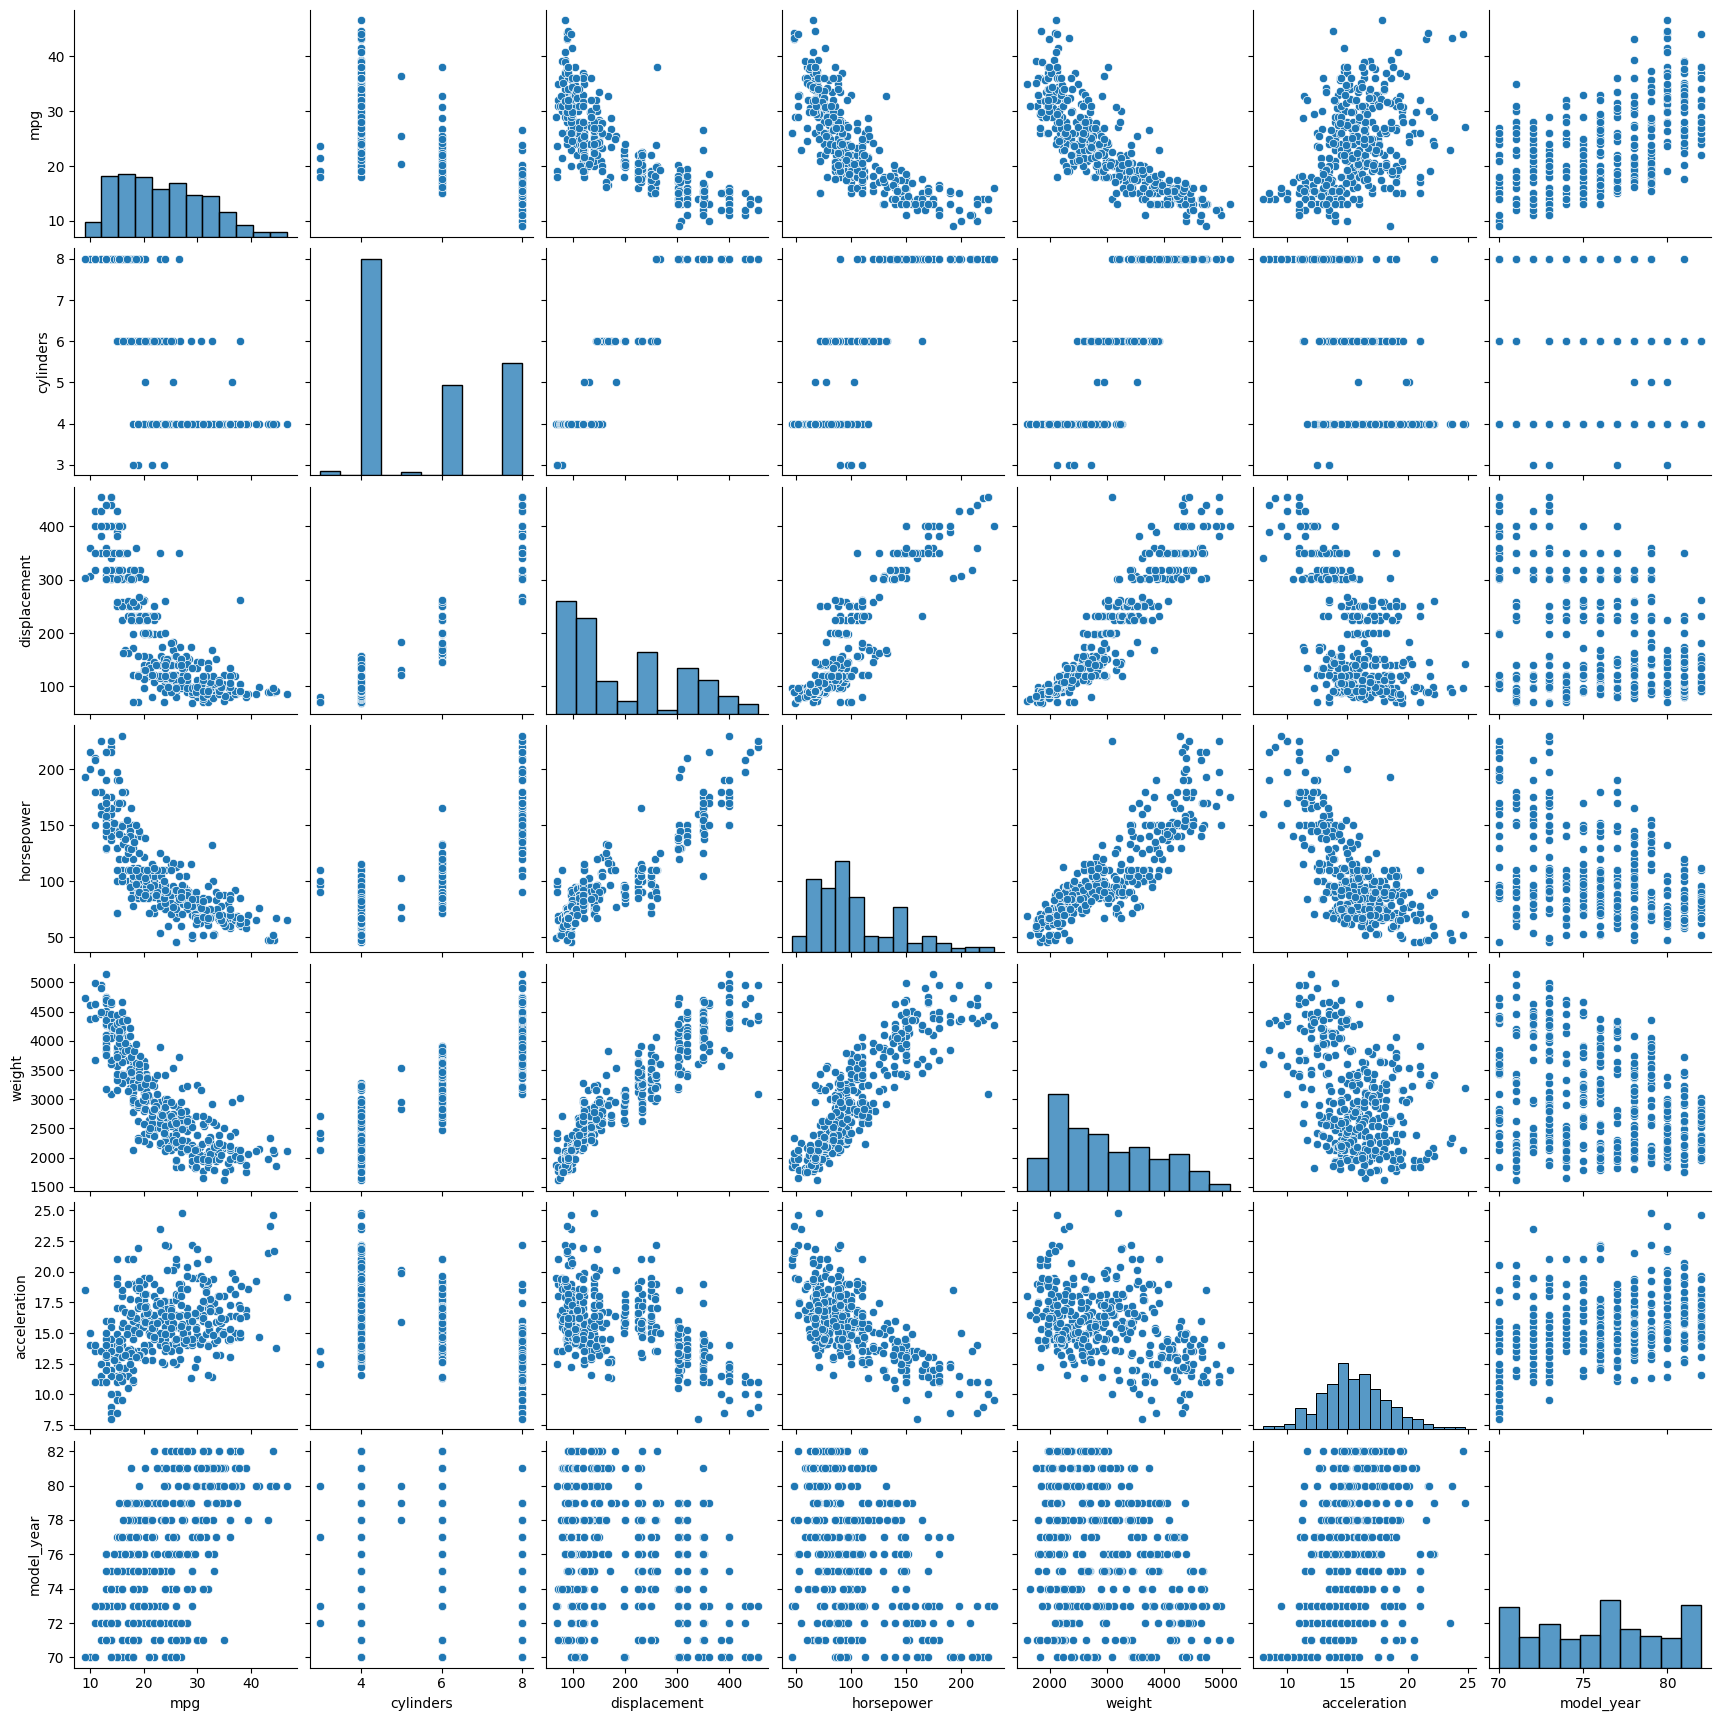

In [106]:
sns.pairplot(Auto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<Axes: >

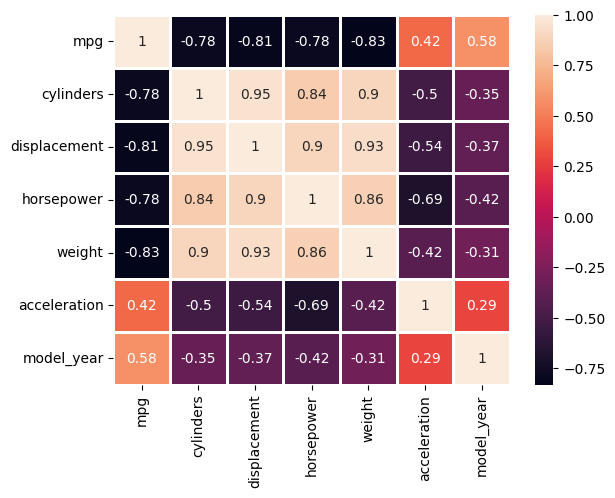

In [107]:
#Se calcula la matriz de correlación y su mapa 
#de calor de  las variables numericas 
display(Auto.corr())
sns.heatmap(Auto.corr(),annot=True,lw=1)

##Modelo de Regresión Multiple



In [108]:
#Se establecen las variables independientes o regresoras
X = Auto[['weight', 'displacement']]
X.head()

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0


In [109]:
#Se elige la variable respuesta o dependiente
Y = Auto['mpg']

In [110]:
#Se importa la instrucción para dividir nuestros datos
from sklearn.model_selection import train_test_split
#Se crean los conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [111]:
#Se importa la instrucción para hacer la regresión lineal
from sklearn.linear_model import LinearRegression
#Se crea la variable modelcomo instancia de LinearRegression
model = LinearRegression()
#Se ajusta el modelo de regresión lineal en los datos de entrenamiento
model.fit(X_train,y_train)

LinearRegression()

In [112]:
#Se imprime el término constate del modelo
print(model.intercept_)

44.428533892174976


In [113]:
#Se extraen los parámetros del modelo de regresión 
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
weight,-0.006096
displacement,-0.014715


In [114]:
#Se evalua el modelo estimado en el conjunto de prueba
predictions = model.predict(X_test)
predictions

array([11.3283981 , 16.53046784, 22.5025605 , 31.32038697, 18.04300245,
       18.96143822, 33.53566454, 18.98793125, 21.4453752 , 28.87828108,
       28.65586936, 29.18772094, 27.26212209, 29.47151737, 23.73149325,
       22.76975419, 14.00302003, 27.69117943, 10.75871694, 16.39172479,
       24.90242671, 26.36470564, 23.06089862, 12.83588056, 31.87535915,
       27.83896318, 22.83071734, 10.75680373, 23.25745938, 10.8728672 ,
       31.12130986, 30.31449503, 22.66255634, 30.33656498, 26.89950161,
       27.4889504 , 26.85009552, 13.88696954,  7.2072893 , 26.73132115,
       26.68613059, 24.63587507, 14.20545659, 15.83694717, 12.66518375,
       28.33613062, 29.76603423, 15.8014329 , 14.96601726, 19.0488944 ,
       25.39853702, 18.95827332, 30.81270663, 30.62141205, 19.75311604,
       19.84351012,  7.92664796, 30.54468279, 15.50249297, 27.90223514,
       22.1926926 , 14.92818769, 31.814396  , 21.24671965, 18.52228953,
       13.800791  , 17.56936419, 29.09942815, 30.01598314, 24.24

In [120]:
#Se importa la intrucción para realizar la evaluación
import statsmodels.api as sm
#Se evalua que tan bien se ajusta nuestro modelo
X_train_Sm = sm.add_constant(X_train)
ls = sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 23 May 2023   Prob (F-statistic):           2.31e-81
Time:                        06:48:51   Log-Likelihood:                -903.16
No. Observations:                 313   AIC:                             1812.
Df Residuals:                     310   BIC:                             1824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.4285      1.362     32.620   